#### In Decision Tree - While solving from root node to depth node We will occur an issue called over fitting but, We need a generalized model with Reduce over fitting

#### How ?
we use techniques called **pruning** and **setting limits** on the trees growth pruning is like trimming the tree after its fully grown, removing branches that don't improve accuracy we also set limits on the trace depth or the minimum number of samples required to split a node this prevents the tree from becoming too complex and memorizing the training data

#### To overcome Overfitting

1. Post pruning
2. Pre pruning

# 🌳 Decision Tree Pruning: Post-Pruning vs Pre-Pruning

## ✅ Post-Pruning (Cost-Complexity Pruning)

### 📌 What is Post-Pruning?
Post-pruning is a method where we:

> **First grow a large decision tree**, then **trim unnecessary branches** to reduce overfitting and improve generalization.

---

### ❓ Why Do We Use Post-Pruning?
- Large trees can **overfit** the training data.
- Overfitting means learning noise and small patterns that don’t generalize well.
- Post-pruning helps keep only the **useful splits**.

---

### 📐 Cost-Complexi:

rCost = Training Error + α × Number of Leaf Nodes
a
- `Training Error`: how well the tree fits the training data.
- `α (alpha)`: a tuning parameter that penalizes complexity.
- `Number of Leaf Nodes`: a measure of how big the tree is.

---

### ⚖️ How Alpha (α) Affects the Tree

- **Small α** → larger trees are allowed.
- **Large α** → smaller trees are preferred.
- We try different α values and choose the one that gives the **best performance on validation data**.

---

### ✅ Goal

> Find the **simplest tree** that still predicts well.

---

### 📊 Post-Pruning Example: Iris Dataset (10 Rows)

| Node Type         | Samples | Class Distribution | Entropy |
|-------------------|---------|--------------------|---------|
| Root              | 10      | [2, 3, 5]          | 1.485   |
| Left Child (≤ 5.0)| 5       | [2, 3, 0]          | 0.971   |
| Right Child (> 5.0)| 5      | [0, 0, 5]          | 0.000   |
| Final Leaves      | Pure    | [✔ Pure classes]   | 0.000   |

---

## 🌲 Pre-Pruning (Early Stopping)

### 📌 What is Pre-Pruning?

> **Stop growing the tree early** if certain conditions are met to avoid making it too complex.

---

### 🛑 When Do We Stop?

Common stopping conditions:
- Node purity is high (e.g., 90% of samples in one class)
- Node has too few samples (e.g., `min_samples_split=4`)
- Max tree depth is reached (e.g., `max_depth=2`)
- Split does not improve the performance much

---

### ⚖️ Pros of Pre-Pruning
- Keeps tree **smaller and faster**
- Reduces risk of overfitting **before it starts**
- Faster training

### ❗ Cons
- Might **stop too early**
- Can **miss useful splits**

---

### 📊 Pre-Pruning Example: Iris Dataset (10 Rows)

Using settings: `max_depth=2`, `min_samples_split=4`

| Node Type         | Samples | Class Distribution | Entropy | Stopping Reason        |
|-------------------|---------|--------------------|---------|------------------------|
| Root              | 10      | [2, 3, 5]          | 1.485   | —                      |
| Left Child (≤ 5.0)| 5       | [2, 3, 0]          | 0.971   | min_samples_split hit |
| Right Child (> 5.0)| 5      | [0, 0, 5]          | 0.000   | —                      |

---

## 🆚 Pre-Pruning vs Post-Pruning

| Feature           | Pre-Pruning           | Post-Pruning               |
|------------------|-----------------------|----------------------------|
| When?            | Before growing fully  | After growing fully        |
| Control?         | Hard rules            | Cost function (alpha)      |
| Risk             | Might underfit        | Might overfit before pruning |
| Flexibility      | Less flexible         | More flexible              |

---

### 🎯 Final Summary

- **Post-Pruning**: Grow a big tree first, then trim.
- **Pre-Pruning**: Stop growing early based on rules.

Use **post-pruning** when you want more control and flexibility. Use **pre-pruning** when you want speed and simplicity.
cy and simplicity:



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
import seaborn as sns

In [6]:
df = sns.load_dataset('iris')

In [7]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [8]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### Independet and Dependent Data
#### From SKlearn I took Iris Dataset (Took  target Data) and from Seaborn same Irirs Dataset (Took all InDependent Variable)

In [10]:
X= df.iloc[:,:-1]  # Independent Dataset
y = iris.target    # Dependent Dataset

In [11]:
# Train test Split 
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [13]:
# Iam Selecting DecisionTreeClassifier  

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
classifier = DecisionTreeClassifier(criterion='entropy') # parameter criterion-entropy

In [16]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [17]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
96,5.7,2.9,4.2,1.3
105,7.6,3.0,6.6,2.1
66,5.6,3.0,4.5,1.5
0,5.1,3.5,1.4,0.2
122,7.7,2.8,6.7,2.0


In [18]:
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


In [19]:
y_train

array([1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0,
       2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2,
       2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2,
       1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2,
       1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [20]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

In [21]:
from sklearn import tree

[Text(0.4444444444444444, 0.9285714285714286, 'x[2] <= 2.45\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.3333333333333333, 0.7857142857142857, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5555555555555556, 0.7857142857142857, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.3333333333333333, 0.6428571428571429, 'x[2] <= 5.35\nentropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.2222222222222222, 0.5, 'x[3] <= 1.45\nentropy = 0.31\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.1111111111111111, 0.35714285714285715, 'entropy = 0.0\nsamples = 26\nvalue = [0, 26, 0]'),
 Text(0.3333333333333333, 0.35714285714285715, 'x[1] <= 2.6\nentropy = 0.722\nsamples = 10\nvalue = [0, 8, 2]'),
 Text(0.2222222222222222, 0.21428571428571427, 'x[0] <= 6.15\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.1111111111111111, 0.07142857142857142, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.3333333333333333, 0.0714285714

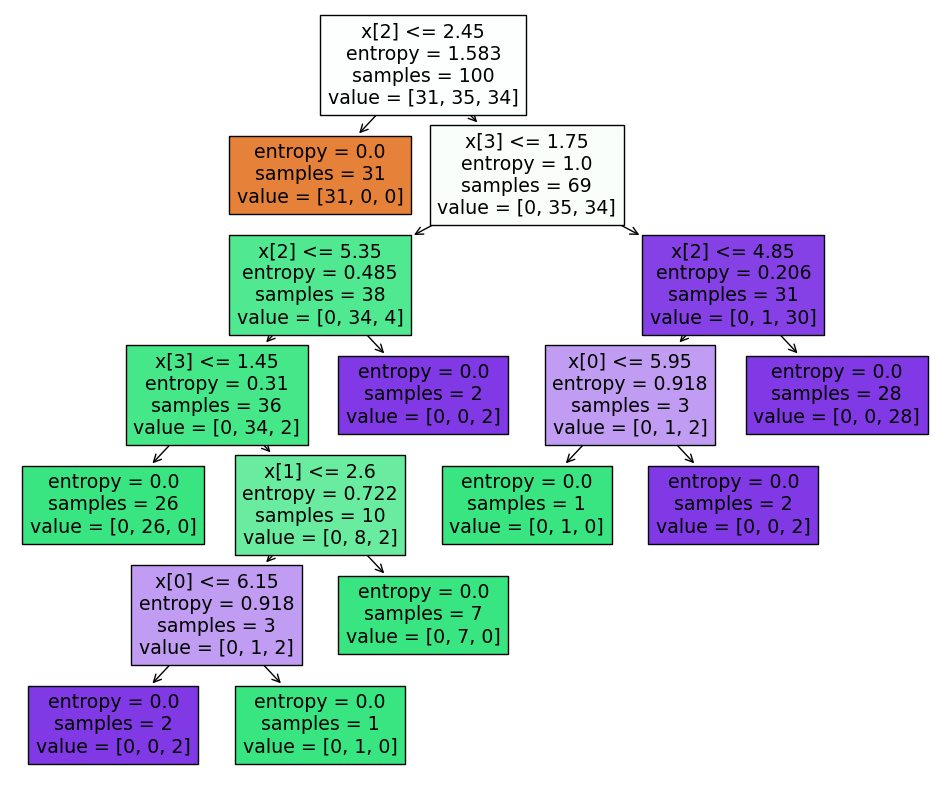

In [22]:
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled=True)

#### - The most important feature for splitting the data is:

x[3] → petal width (cm): It's used at the root, meaning it's the most discriminative feature.

Followed by x[2] (petal length), x[1] (sepal width), and x[0] (sepal length).

#### - The value = [x, y, z] indicates counts for each class:

Setosa = index 0

Versicolor = index 1

Virginica = index 2

For example: value = [31, 0, 0] → 31 Setosa samples (pure node).

##### - Many leaf nodes have entropy = 0.0, indicating perfect classification.

This means your model fits the training data very well, possibly overfitting slightly but typical for decision trees.

In [107]:
## Post Prunning
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=2)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.206\nsamples = 31\nvalue = [0, 1, 30]')]

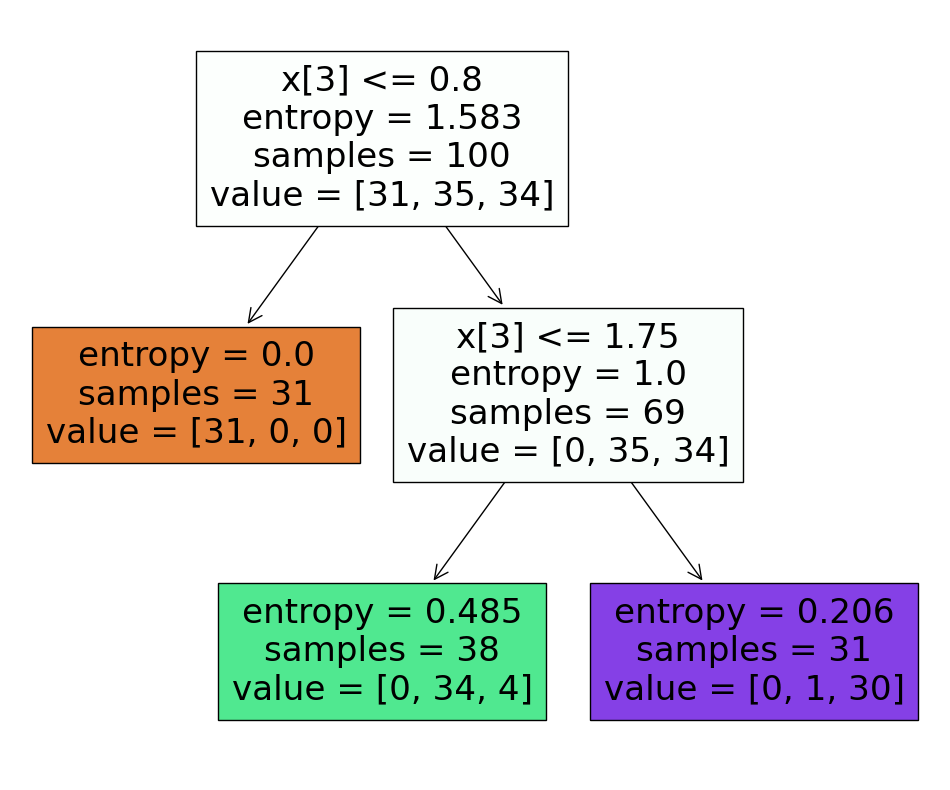

In [108]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled=True)

In [109]:
##prediction
y_pred=classifier.predict(X_test)

In [110]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [111]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))

0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



## DecisionTree Prepruning And Hyperparameter Tuning For Huge Data

In [112]:
import warnings
warnings.filterwarnings('ignore')

In [113]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']

}

#### To find the best accuracy model with parameters and hyperparameter tuning and we use some cross validation models

In [114]:
from sklearn.model_selection import GridSearchCV

In [115]:
classifier=DecisionTreeClassifier()
clf=GridSearchCV(classifier,param_grid=parameter,cv=5,scoring='accuracy')

In [116]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [118]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'random'}

In [119]:
y_pred=clf.predict(X_test)

In [120]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))

0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        17

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



Understanding the Trees
1. First Image – Post-Pruning Tree
Simpler Tree: It has only 5 terminal nodes (leaf nodes).

The tree stops splitting after achieving low entropy or homogeneous class distribution (i.e., one class dominates).

Example:

The left child [31, 0, 0] is pure (entropy = 0).

The rest of the tree has two branches from [0, 35, 34], split to [0, 34, 4] and [0, 1, 30], which are mostly pure.

2. Second Image – Pre-Pruning Tree
More Complex Tree: It has more levels and splits (deeper and broader).

The tree keeps splitting even for small gains in information (entropy decrease).

Leads to many small leaf nodes, some with as few as 1 or 2 samples (e.g., [0, 1, 0], [0, 0, 2], etc.).

🧠 What’s Happening in the Trees?
Metric	Pre-Pruning Tree	Post-Pruning Tree
Tree Depth	Higher	Lower
Number of Leaves	Many	Few
Overfitting Risk	High	Reduced
Generalization	Worse	Better
Complexity	High	Low

✅ Conclusion
Post-pruning simplifies the tree by removing splits that do not significantly reduce entropy or improve classification. It results in:

Better generalization

Lower variance

Easier interpretation

Pre-pruning leads to overfitting, capturing even the noise in the training data.

Bottom Line: The post-pruned tree is preferred for production and general-purpose classification because it balances accuracy and simplicity, avoiding overfitting.